In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict


In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv('concrete (1).csv')


# EXPLORATORY DATA ANALYSIS

In [5]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


# All values are numeric

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Size of data frame

In [7]:
df.shape 

(1030, 9)

In [8]:
df.describe

<bound method NDFrame.describe of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2 

# No missing values

In [9]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# UNIVARIATE ANALYSIS

In [10]:
def uni_distribution(a):
    
    a.value_counts(normalize = 'True').plot(kind = 'bar')
    

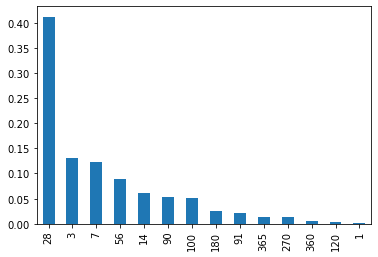

In [11]:
uni_distribution(df['age'])

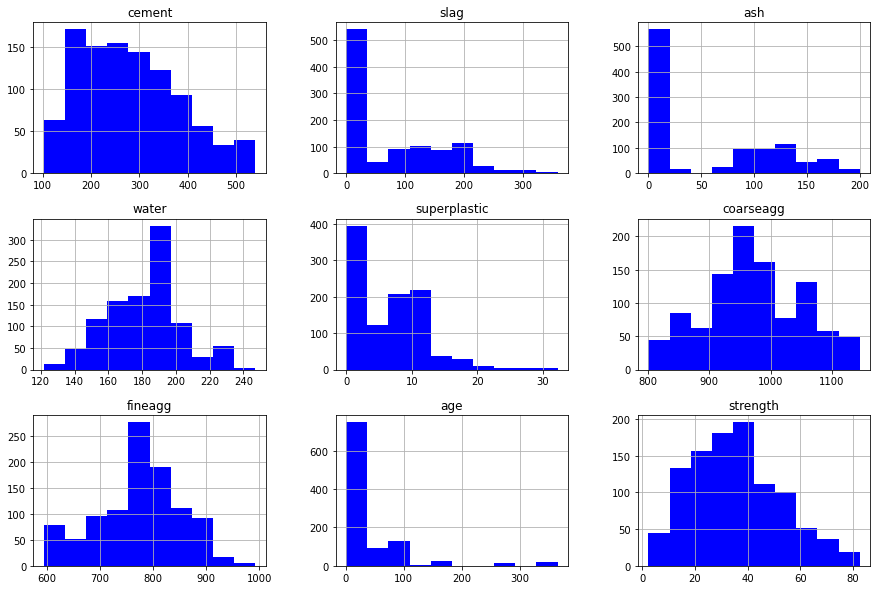

In [12]:
df.hist(figsize=(15,10),color='blue')
plt.show()

# Finding outliers with help of boxplot

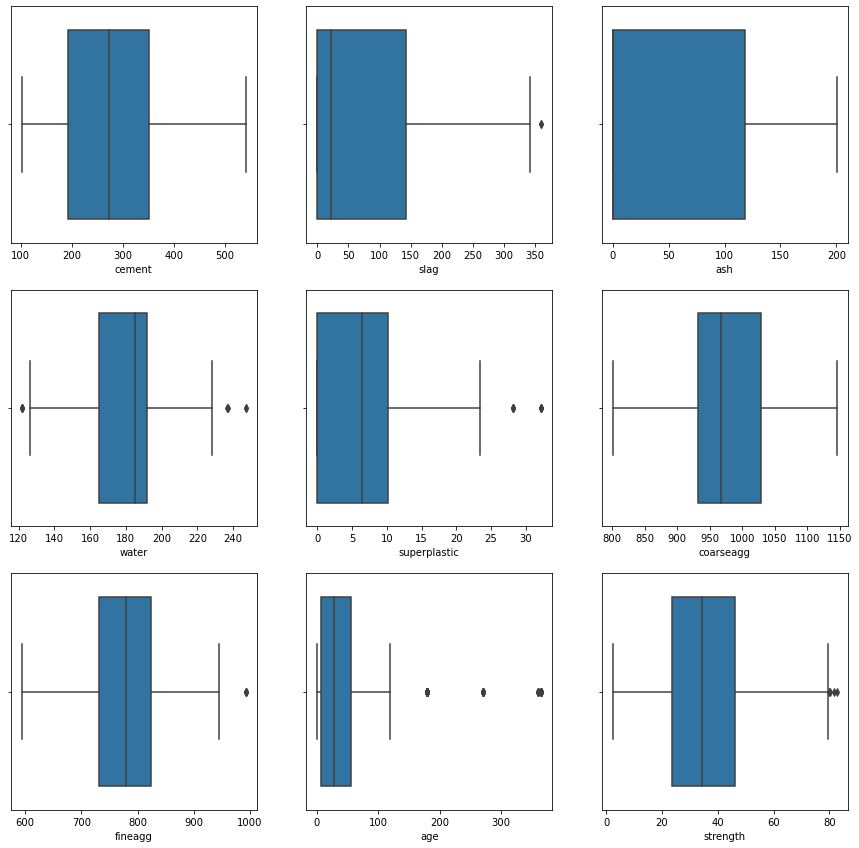

In [13]:
i=1
plt.figure(figsize = (15,20))
for col in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(x = df[col], data = df)
    i+=1

# BIVARIATE ANALYSIS

In [14]:
def uni_box(a):
    a.plot.box(figsize=(10,8))

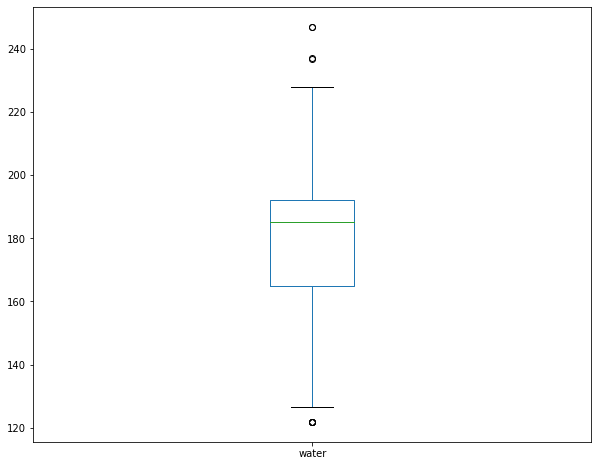

In [16]:
uni_box(df['water'])

# Find the coreation with Strength

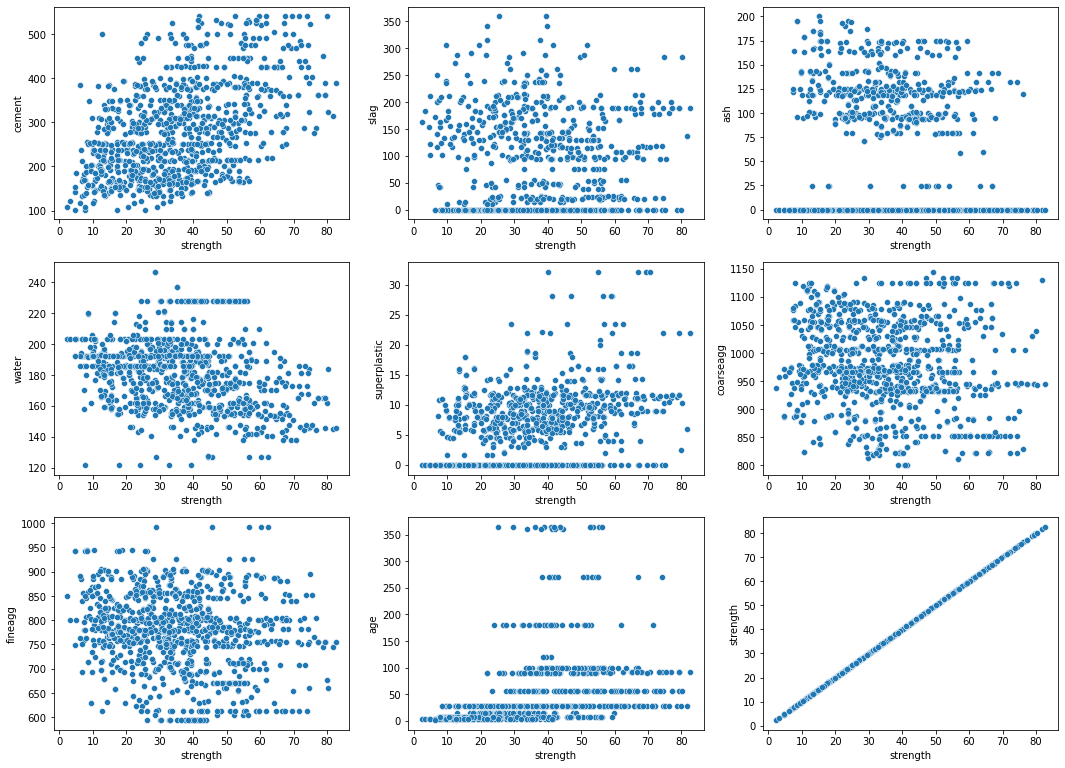

In [17]:
i=1
plt.figure(figsize = (18,18))
for col in df.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(data=df,x='strength',y=col)
    i+=1

#### Here we can see that compressive strength is highly correlated with cement

<AxesSubplot:>

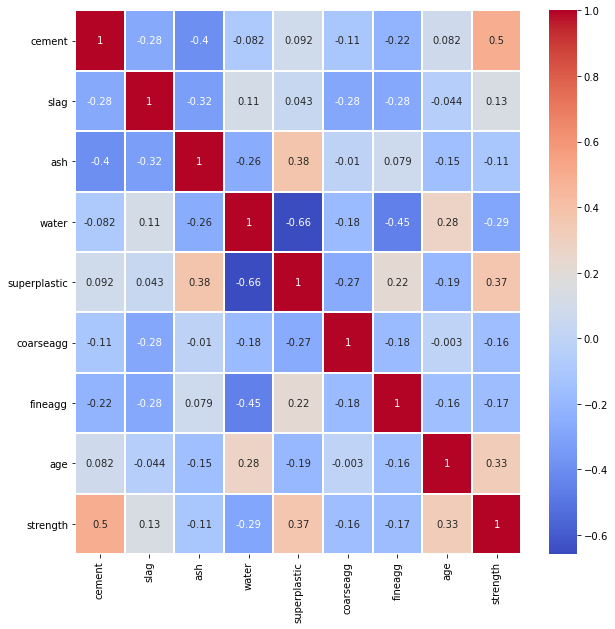

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1,annot=True,cmap='coolwarm')

In [19]:
correlation=df.corr()['strength'].sort_values()

<AxesSubplot:>

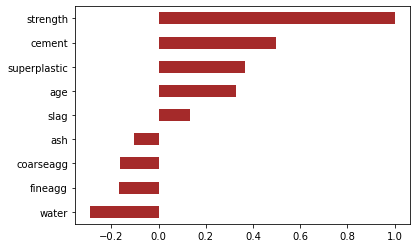

In [20]:
correlation.plot(kind='barh',color='brown')

### We can see that cement, superplastic,age,are positively correlated with compressive strength.

#### We can see that water ,fine aggregate are negatively correlated with compressive strength.

In [27]:
from sklearn.linear_model import SGDRegressor,GammaRegressor,Lasso,GammaRegressor,ElasticNet,Ridge
from sklearn.linear_model import RANSACRegressor,HuberRegressor, BayesianRidge,LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop(columns='strength')
Y=df[['strength']]

In [25]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=0)

In [29]:
lr=LinearRegression()
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()
gamma=GammaRegressor()

In [36]:
algo=[lr,sgd,lasso,ridge,rf,dt,gboost,bagging,adboost,knn,etr]

In [37]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    accuracy_train.append(algo[i].score(x_train,y_train))
    accuracy_test.append(algo[i].score(x_test,y_test))
    model.append(algo[i])

In [38]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

,model,score_train,score_test
0,LinearRegression(),0.624519,0.584797
1,SGDRegressor(),0.623395,0.580467
2,Lasso(),0.58067,0.523978
3,Ridge(),0.624495,0.584197
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.983387,0.899837
5,DecisionTreeRegressor(),0.994915,0.849708
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.94883,0.899221
7,(DecisionTreeRegressor(random_state=203202900)...,0.975561,0.881754
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.819093,0.747784
9,KNeighborsRegressor(),0.814832,0.698464
